# Predicting Flight Fares: Analyzing Airfare Based on the Duration of a Flight, Time Till Departure and Class

## Introduction

Airlines operate within a highly competitive and evolving environment where pricing strategies play a crucial role in attracting customers and maximizing profitability. The price of a flight ticket is very important to a consumer, it may determine which company they fly with or whether they fly at all. Consumers have different wants and needs when it comes to which flight they take, and airlines price their fares accordingly. Flight fares are influenced by many factors including demand, competition, fuel prices, and operating costs. Airlines invest in and employ revenue management systems that constantly adjust ticket prices based on the current demand and other factors such as: duration till departure, the departure and arrival times themselves, source and destination locations, number of stops in a trip, and the class of the ticket. In our project we will answer the following: Can we accurately and consistently predict the price of a flight ticket based on it's duration till departure, duration of the flight, and class of the ticket (Economy or Business)? To answer this question we will be using a dataset that contains various flights and their details from the website Easemytrip for flights between India's top 6 metro cities. We will be using the cleaned data in which there are 300261 datapoints and 11 categories.

In [2]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(tidyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [28]:
flight_data <- read_csv("https://raw.githubusercontent.com/JaskarnNijjar/DSCI-100-Group-Project/main/Clean_Dataset.csv")

flight_data

New names:
• `` -> `...1`
Rows: 300153 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): airline, flight, source_city, departure_time, stops, arrival_time, ...
dbl (4): ...1, duration, days_left, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954


In [4]:
# Summarizes how many flights of each class are in the data set
class_summary <- flight_data |>
  group_by(class) |>
  summarize(n = n(), .groups = 'drop')

# Summarizes how many flights from each airline are in the data set
airline_summary <- flight_data |>
    group_by(airline) |>
    summarise(n = n(), .groups = 'drop')

# Summarizes the mean of every quantative predictor as well as the mean price for a flight fare
mean_summary <- flight_data |>
  summarize(mean_duration = mean(duration, na.rm = TRUE),
    mean_days_left = mean(days_left, na.rm = TRUE),
    mean_price = mean(price, na.rm = TRUE)
  )

# Checks to see how many values are missing in each column in the data set
missing_data <- flight_data |>
  summarize(across(everything(), ~sum(is.na(.))))

class_summary

airline_summary

mean_summary

missing_data

class,n
<chr>,<int>
Business,93487
Economy,206666


airline,n
<chr>,<int>
AirAsia,16098
Air_India,80892
GO_FIRST,23173
Indigo,43120
SpiceJet,9011
Vistara,127859


mean_duration,mean_days_left,mean_price
<dbl>,<dbl>,<dbl>
12.22102,26.00475,20889.66


...1,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0


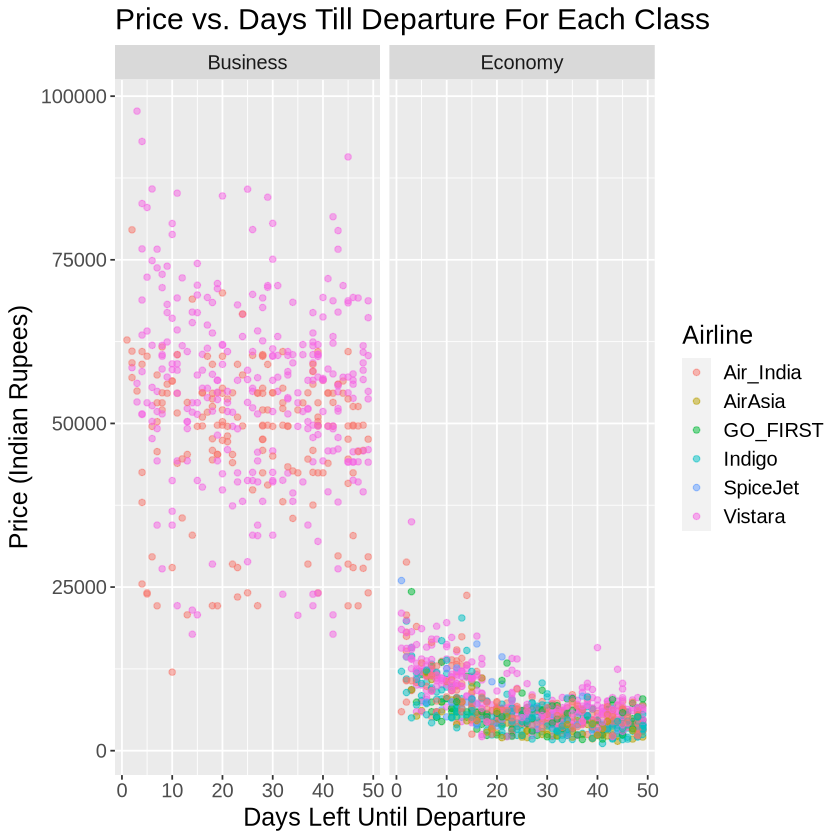

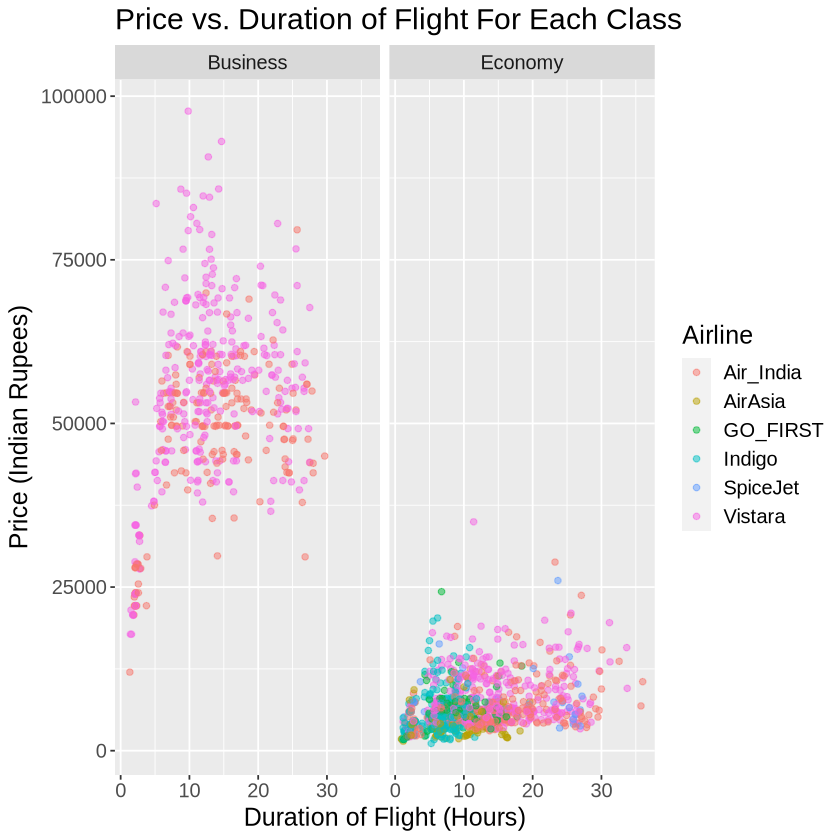

In [27]:
# Produces a sample of 1500 flights in order to produce plots
flight_data_sample <- sample_n(flight_data, 1500)


# Plotting the relationship between price and duration till departure for each class
durationtilldeparture_price_plot <- ggplot(flight_data_sample, aes(x = days_left, y = price, color = airline)) +
    geom_point(alpha = 0.5) +
    facet_grid(. ~ class) +
    labs(x = "Days Left Until Departure", y = "Price (Indian Rupees)", color = "Airline") + 
    ggtitle("Price vs. Days Till Departure For Each Class") +
    theme(text = element_text(size = 15))

# Plotting the relationship between price and duration of flight for each class
duration_price_plot <- ggplot(flight_data_sample, aes(x = duration, y = price, color = airline)) +
    geom_point(alpha = 0.5) +
    facet_grid(. ~ class) +
    labs(x = "Duration of Flight (Hours)", y = "Price (Indian Rupees)", color = "Airline") + 
    ggtitle("Price vs. Duration of Flight For Each Class") +
    theme(text = element_text(size = 15))

durationtilldeparture_price_plot
duration_price_plot

## Methods

We are planning to predict the flight’s price by using the multivariable linear regression model that can be done in R. For this we will be using durations, days_left, and class to predict the price of a ticket. This regression approach will be used because the flight’s price is a numerical variable, not a categorical variable. We will split the dataset into a training and testing set, then create a classifier through model specification and recipe functions. Afterwards, we will fit the model and predict values in the testing set. One way to visualize the result is to plot the data in price vs predictor graph, and then plot the line regression on top of it.

## Expected Outcomes and Significance

This project will reveal:
* The relationship between a flight’s price and it's duration.
* The relationship between a flight’s price and the number of days till departure.
* How this relationship varies for either class.

We expect to find :
* A Flight’s price will decrease as the duration increases.
* A Flight’s price will inrease as the days till departure decrease.
* Our model is able to accurately predict the price of a ticket based on its durations and class.

Our findings could impact:
* A consumer's knowledge on the relationships between durations, class, and price.
* A consumer's ability to predict the best time to buy a ticket flight to get the cheapest price.
* Airlines and travel agencies could use our findings to alter their pricing strategies.

Future questions:
* How would our results vary if we introduced more variables?
* How do other factors (fuel prices, time of the year, and events) impact flight fares?
* How do external events (pandemics, recessions, and disasters) impact flight fares?	